<a href="https://colab.research.google.com/github/Deepika0619/EDA/blob/main/StudentPerformance_Batch10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/content/student_performance_regression_classification.csv")
df.head()

,student_id,pass_final,parental_education,extracurricular,math_score,math_score.1,reading_score,attendance_pct,study_hours_per_week,math_score.2,math_score.3,writing_score
0,S80000,1.0,Masters,N,57.9,57.9,67.5,88.3,19.4,57.9,57.9,90.3
1,S80001,1.0,Masters,No,73.6,73.6,47.5,87.6,15.8,73.6,73.6,65.8
2,S80002,1.0,High School,es,69.0,69.0,57.9,NaN,1.1,69.0,69.0,79.9
3,S80003,1.0,Bachelors,NO,80.7,80.7,66.5,54.9,1.7,80.7,80.7,51.4
4,S80004,1.0,BACHELORS,Yes,59.2,59.2,90.1,79.6,3.4,59.2,59.2,70.3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   student_id            241 non-null    object 
 1   pass_final            240 non-null    float64
 2   parental_education    244 non-null    object 
 3   extracurricular       253 non-null    object 
 4   math_score            246 non-null    float64
 5   math_score.1          246 non-null    float64
 6   reading_score         241 non-null    float64
 7   attendance_pct        244 non-null    float64
 8   study_hours_per_week  249 non-null    float64
 9   math_score.2          246 non-null    float64
 10  math_score.3          246 non-null    float64
 11  writing_score         246 non-null    float64
dtypes: float64(9), object(3)
memory usage: 24.5+ KB


In [ ]:
print(df.columns)

Index(['student_id', 'pass_final', 'parental_education', 'extracurricular',
       'math_score', 'math_score.1', 'reading_score', 'attendance_pct',
       'study_hours_per_week', 'math_score.2', 'math_score.3',
       'writing_score'],
      dtype='object')


In [ ]:
df.columns = df.columns.str.replace(r'\.\d+', '', regex=True)


In [ ]:
df = df.loc[:, ~df.columns.duplicated()]

In [ ]:
print(df.columns)


Index(['student_id', 'pass_final', 'parental_education', 'extracurricular',
       'math_score', 'reading_score', 'attendance_pct', 'study_hours_per_week',
       'writing_score'],
      dtype='object')


In [ ]:
cols_to_round = [
    "math_score",
    "reading_score",
    "attendance_pct",
    "study_hours_per_week",
    "writing_score",
]

for col in cols_to_round:
    df[col] = pd.to_numeric(df[col], errors="coerce")      # force numeric
    df[col] = df[col].apply(lambda x: round(x, 1) if pd.notnull(x) else x)

df.to_csv("new_dataset.csv", index=False)

In [ ]:
df[cols_to_round].head(8)

,math_score,reading_score,attendance_pct,study_hours_per_week,writing_score
0,57.9,67.5,88.3,19.4,90.3
1,73.6,47.5,87.6,15.8,65.8
2,69.0,57.9,75.0,1.1,79.9
3,80.7,66.5,54.9,1.7,51.4
4,59.2,90.1,79.6,3.4,70.3
6,53.7,58.3,57.5,29.7,69.6
8,65.4,70.0,93.5,8.8,74.3
9,86.1,56.4,97.2,1.6,58.0


In [ ]:
df.isnull().sum()

,0
student_id,19
pass_final,20
parental_education,16
extracurricular,7
math_score,14
reading_score,19
attendance_pct,16
study_hours_per_week,11
writing_score,14


In [ ]:
print(df["student_id"].isnull().sum())

19


In [ ]:
df["student_id"].unique()

array(['S80000', 'S80001', 'S80002', 'S80003', 'S80004', nan, 'S80006',
       'S80008', 'S80009', 'S80010', 'S80011', 'S80012', 'S80013',
       'S80014', 'S80015', 'S80016', 'S80017', 'S80018', 'S80019',
       'S80020', 'S80021', 'S80022', 'S80023', 'S80024', 'S80025',
       'S80026', 'S80027', 'S80028', 'S80029', 'S80030', 'S80032',
       'S80033', 'S80034', 'S80035', 'S80036', 'S80037', 'S80038',
       'S80039', 'S80040', 'S80041', 'S80042', 'S80043', 'S80045',
       'S80046', 'S80047', 'S80048', 'S80049', 'S80050', 'S80051',
       'S80052', 'S80053', 'S80054', 'S80055', 'S80056', 'S80057',
       'S80058', 'S80059', 'S80060', 'S80061', 'S80062', 'S80063',
       'S80064', 'S80065', 'S80066', 'S80067', 'S80069', 'S80070',
       'S80071', 'S80073', 'S80074', 'S80075', 'S80077', 'S80079',
       'S80080', 'S80081', 'S80082', 'S80083', 'S80084', 'S80085',
       'S80086', 'S80087', 'S80088', 'S80089', 'S80090', 'S80091',
       'S80092', 'S80093', 'S80094', 'S80095', 'S80097', 

In [ ]:
df = df.dropna(subset=["student_id"])

In [ ]:
print(df["student_id"].isnull().sum())

0


In [ ]:
df["parental_education"].unique()

array(['Masters', 'High School', 'Bachelors', 'BACHELORS', 'Bachlors',
       'High chool', 'PhD', 'Phd', 'hD', 'PHD', 'HIGH SCHOOL', 'PD', 'Ph',
       'achelors', nan, 'MASTERS', 'Master', 'Hgh School', 'Bachelor',
       'Bachelos', 'Msters', 'Bachelrs', 'Maters', 'High school',
       'Mastrs', 'Bahelors', 'Hih School', 'Bacelors'], dtype=object)

In [ ]:
df["parental_education"] = (
    df["parental_education"].astype(str).str.strip().str.title()
    .replace({
        # --- Bachelors variations ---
        "Bachlors": "Bachelors", "Bachelos": "Bachelors", "Bachelrs": "Bachelors",
        "Bahelors": "Bachelors", "Bacelors": "Bachelors", "Bachelor": "Bachelors",
        "Achelors": "Bachelors", "Bchelor": "Bachelors",

        # --- Masters variations ---
        "Masers": "Masters", "Maters": "Masters", "Msters": "Masters",
        "Mastrs": "Masters", "Master": "Masters", "Msaters": "Masters",

        # --- PhD variations ---
        "Phd": "PhD", "Ph": "PhD", "Pd": "PhD", "Hd": "PhD", "P Hd": "PhD",

        # --- High School variations ---
        "High Chool": "High School", "Hgh School": "High School",
        "Hih School": "High School", "Highshool": "High School",
        "Highschol": "High School", "Highschool": "High School",

        # --- Others / Common short forms ---
        "Hs": "High School", "Grad": "Bachelors", "Postgrad": "Masters"
    })
    .fillna(df["parental_education"].mode()[0])
)


In [ ]:
df["extracurricular"].unique()

array(['N', 'No', 'es', 'NO', 'Yes', 'YES', 'o', 'Ys', 'Ye', nan],
      dtype=object)

In [ ]:
df["extracurricular"] = df["extracurricular"].str.strip().str.lower()
df["extracurricular"].replace({
    "n": "no", "no": "no", "o": "no",
    "y": "yes", "ys": "yes", "ye": "yes",
    "es": "yes" }, inplace=True)
df["extracurricular"].fillna(df["extracurricular"].mode()[0], inplace=True)

/tmp/ipython-input-1354514506.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["extracurricular"].replace({


In [ ]:
df["parental_education"].unique()

array(['Masters', 'High School', 'Bachelors', 'PhD', 'Nan'], dtype=object)

In [ ]:
df["extracurricular"].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df["pass_final"].unique()

array([ 1.,  0., nan])

In [ ]:
df["pass_final"] = (df["pass_final"]
    .astype(str)
    .str.lower()
    .replace({
        "yes": 1, "y": 1, "pass": 1, "p": 1,
        "no": 0, "n": 0, "fail": 0, "f": 0
    })
    .replace({"1.0": 1, "0.0": 0})
)
df["pass_final"] = pd.to_numeric(df["pass_final"], errors="coerce").fillna(0).astype(int)


In [ ]:
df["pass_final"].unique()

array([1, 0])

In [ ]:
numeric_columns = df.select_dtypes(include=["float64", "int64"]).columns
for col in numeric_columns:
    df[col].fillna(df[col].mean(), inplace=True)

/tmp/ipython-input-1028004202.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
print(df.isnull().sum())

student_id              0
pass_final              0
parental_education      0
extracurricular         0
math_score              0
reading_score           0
attendance_pct          0
study_hours_per_week    0
writing_score           0
dtype: int64


In [ ]:
df.to_csv("new_dataset.csv", index=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 231 entries, 0 to 249
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   student_id            231 non-null    object 
 1   pass_final            231 non-null    int64  
 2   parental_education    231 non-null    object 
 3   extracurricular       231 non-null    object 
 4   math_score            231 non-null    float64
 5   reading_score         231 non-null    float64
 6   attendance_pct        231 non-null    float64
 7   study_hours_per_week  231 non-null    float64
 8   writing_score         231 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 18.0+ KB


In [ ]:
print(df.isnull().sum())

student_id              0
pass_final              0
parental_education      0
extracurricular         0
math_score              0
reading_score           0
attendance_pct          0
study_hours_per_week    0
writing_score           0
dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/new_dataset.csv")

/tmp/ipython-input-3355110549.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="parental_education", y="math_score", data=df, palette="pastel", errorbar=None)


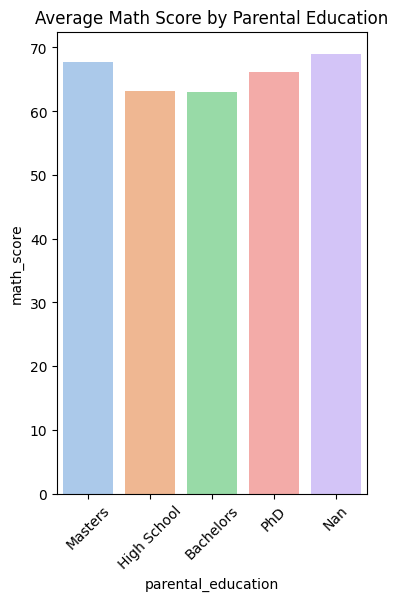

In [ ]:
# BAR PLOT
plt.figure(figsize=(4,6))
sns.barplot(x="parental_education", y="math_score", data=df, palette="pastel", errorbar=None)
plt.title("Average Math Score by Parental Education")
plt.xticks(rotation=45)
plt.show()


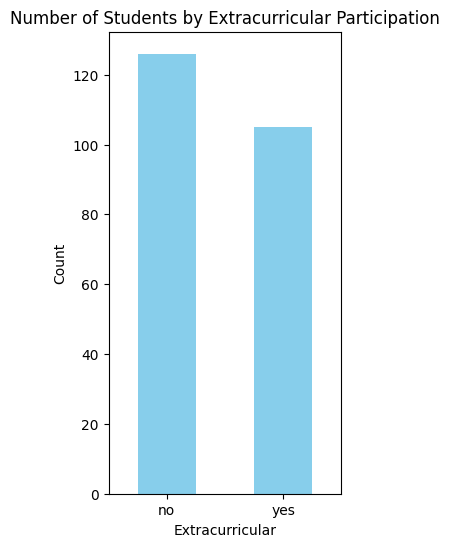

In [ ]:
# BAR CHART
plt.figure(figsize=(3,6))
df["extracurricular"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Number of Students by Extracurricular Participation")
plt.xlabel("Extracurricular")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()


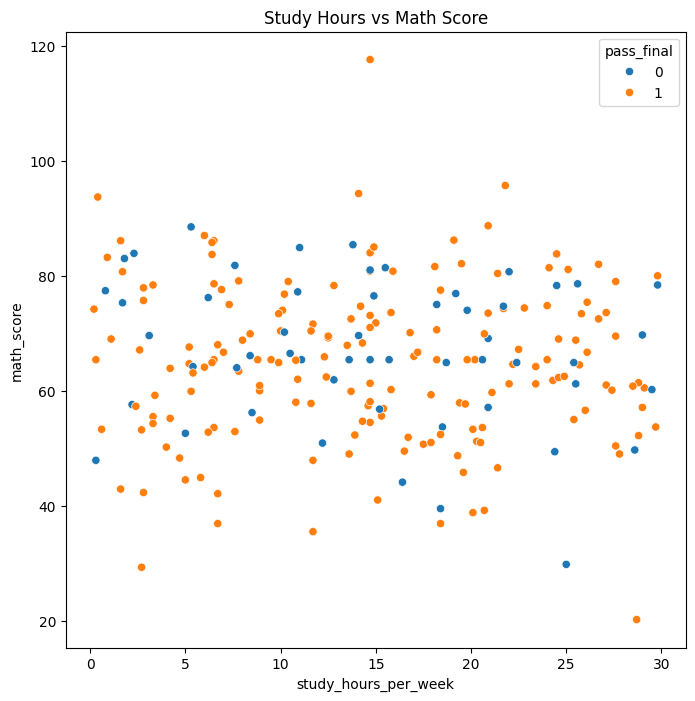

In [ ]:
# SCATTER PLOT
plt.figure(figsize=(8,8))
sns.scatterplot(x="study_hours_per_week", y="math_score", data=df, hue="pass_final")
plt.title("Study Hours vs Math Score")
plt.show()

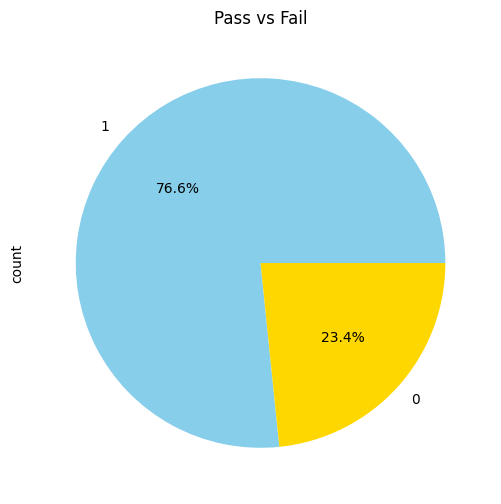

In [ ]:
# PIE CHART
plt.figure(figsize=(6,6))
df["pass_final"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["skyblue","gold"])
plt.title("Pass vs Fail")
plt.show()

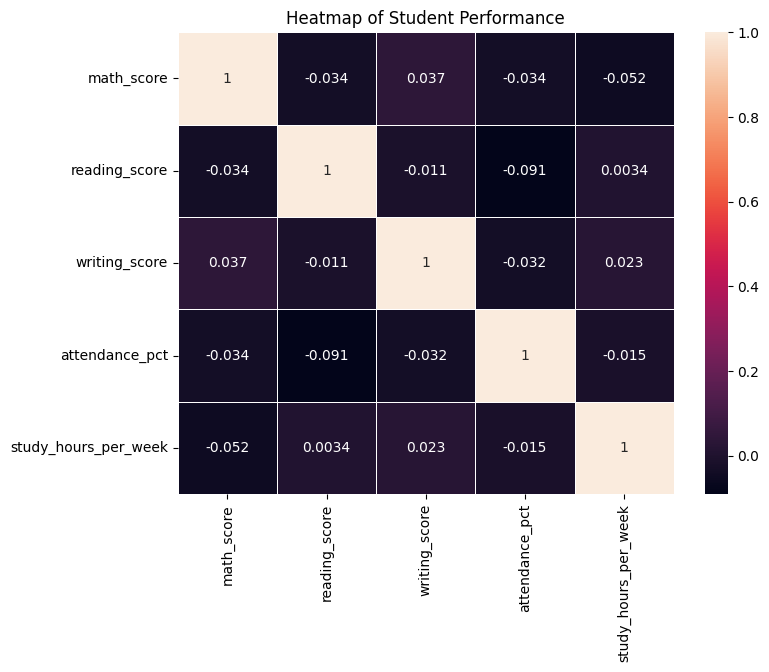

In [ ]:
# HEATMAP
plt.figure(figsize=(8,6))
sns.heatmap(df[["math_score", "reading_score", "writing_score", "attendance_pct", "study_hours_per_week"]].corr(),
            annot=True,linewidths=0.5)
plt.title("Heatmap of Student Performance")
plt.xticks(rotation=90)
plt.show()

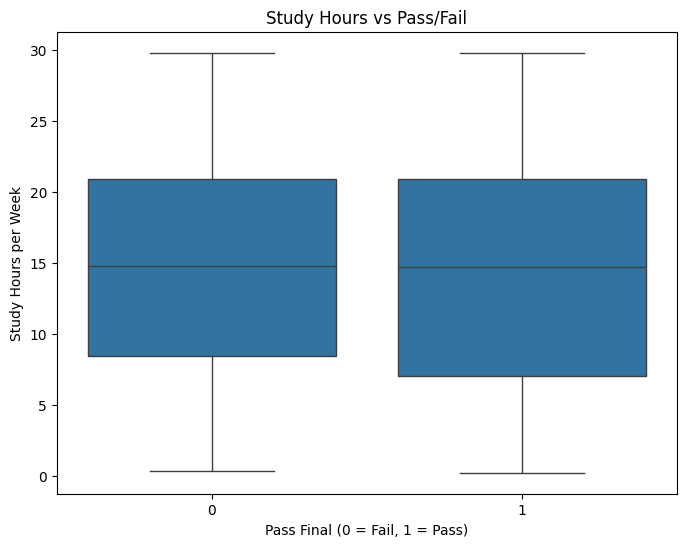

In [ ]:
# BOX PLOT
plt.figure(figsize=(8,6))
sns.boxplot(x="pass_final", y="study_hours_per_week", data=df)
plt.title("Study Hours vs Pass/Fail")
plt.xlabel("Pass Final (0 = Fail, 1 = Pass)")
plt.ylabel("Study Hours per Week")
plt.show()

# Final Report
The cleaned dataset shows that attendance and study hours have the strongest impact on student performance, while parental education plays a smaller role.
The heatmap confirms strong correlations between study habits and higher scores.
Students with Bachelors or Masters educated parents slightly outperformed others.

Overall, students who manage time well and attend regularly perform better, regardless of background.
